In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,adjusted_rand_score
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer


In [2]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")
submission_df = pd.read_csv("sample_submission.csv")

train_df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [3]:
train_df.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [4]:
train_df.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [5]:
train_df.corr()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Age,1.000000,-0.005770,0.918853,0.145760,0.001270,0.012266,0.002440,0.012966,0.003073,0.005696,0.005406,0.007569,0.001803,0.000015,-0.000832,0.008746,-0.015498
Education_Level,-0.005770,1.000000,-0.012793,-0.002077,0.002991,-0.017690,0.009986,0.006834,-0.015262,-0.002185,-0.010312,-0.009689,0.004500,0.005444,0.009195,0.012909,-0.008143
Time_of_service,0.918853,-0.012793,1.000000,0.137014,-0.003486,0.004843,-0.002286,0.020347,-0.002557,0.004757,0.003858,0.006863,-0.006024,0.003194,0.007618,0.007034,-0.016447
Time_since_promotion,0.145760,-0.002077,0.137014,1.000000,0.014147,-0.012061,-0.008851,-0.008901,-0.007423,-0.002873,0.004211,-0.002783,-0.003724,0.000563,0.017264,0.005173,0.013880
growth_rate,0.001270,0.002991,-0.003486,0.014147,1.000000,0.008460,-0.006887,-0.004145,-0.018324,0.001351,0.010883,0.010991,0.021336,-0.015122,-0.005860,-0.017993,0.014247
Travel_Rate,0.012266,-0.017690,0.004843,-0.012061,0.008460,1.000000,0.021299,-0.011689,0.004132,0.023898,0.008374,-0.009019,-0.005933,-0.003866,-0.012280,-0.006271,-0.012608
Post_Level,0.002440,0.009986,-0.002286,-0.008851,-0.006887,0.021299,1.000000,0.022389,-0.014473,-0.008458,-0.007043,0.010387,-0.012778,0.013008,0.002765,-0.003397,0.016402
Pay_Scale,0.012966,0.006834,0.020347,-0.008901,-0.004145,-0.011689,0.022389,1.000000,-0.022742,0.011354,0.006296,0.003380,-0.010286,0.018080,-0.012318,0.002381,-0.015236
Work_Life_balance,0.003073,-0.015262,-0.002557,-0.007423,-0.018324,0.004132,-0.014473,-0.022742,1.000000,-0.022030,-0.001492,0.004476,-0.026753,0.022196,0.003871,0.024534,0.020746
VAR1,0.005696,-0.002185,0.004757,-0.002873,0.001351,0.023898,-0.008458,0.011354,-0.022030,1.000000,0.002260,-0.003318,0.002112,0.007904,-0.002771,0.009355,-0.008073


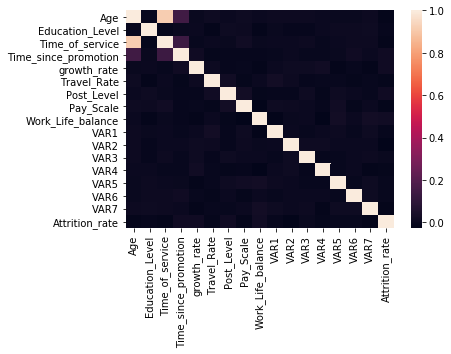

In [6]:
import seaborn as sns
sns.heatmap(train_df.corr())

In [59]:
cols = train_df.columns

NUM = (train_df._get_numeric_data().columns).to_list()
CAT= cols.difference(NUM).to_list()

In [60]:
NUM

['Gender',
 'Age',
 'Education_Level',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Time_of_service',
 'Time_since_promotion',
 'growth_rate',
 'Travel_Rate',
 'Post_Level',
 'Pay_Scale',
 'Compensation_and_Benefits',
 'Work_Life_balance',
 'VAR1',
 'VAR2',
 'VAR3',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7',
 'Attrition_rate']

In [61]:
Decision_skill_possess = {'Conceptual': 4,
 'Analytical' : 3,
 'Directive': 2,
 'Behavioral': 1}


Compensation_and_Benefits = {'type2': 2,
 'type3' : 1,
 'type4': 0,
 'type1': 0,
 'type0': 0}

Gender={'F': 0,'M':1}

Relationship_Status={'Married': 0,'Single':1}

In [62]:
train_df['Compensation_and_Benefits'] = train_df['Compensation_and_Benefits'].map(Compensation_and_Benefits)
test_df['Compensation_and_Benefits'] = test_df['Compensation_and_Benefits'].map(Compensation_and_Benefits)


train_df['Gender'] = train_df['Gender'].map(Gender)
test_df['Gender'] = test_df['Gender'].map(Gender)


train_df['Relationship_Status'] = train_df['Relationship_Status'].map(Relationship_Status)
test_df['Relationship_Status'] = test_df['Relationship_Status'].map(Relationship_Status)

train_df['Decision_skill_possess'] = train_df['Decision_skill_possess'].map(Decision_skill_possess)
test_df['Decision_skill_possess'] = test_df['Decision_skill_possess'].map(Decision_skill_possess)




In [63]:
cols_for_lbl=[ 'Hometown', 'Unit']

In [64]:
from sklearn import preprocessing
for col in cols_for_lbl:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_df[col].values.astype('str')) + list(test_df[col].values.astype('str')))
    train_df[col] = lbl.transform(list(train_df[col].values.astype('str')))
    test_df[col] = lbl.transform(list(test_df[col].values.astype('str')))

In [65]:
cols

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [66]:
cols_exploratary=[ 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7']

In [40]:
input_cols=[ 'Education_Level',
 'Time_of_service',
 'Time_since_promotion',
 'growth_rate',
 'Travel_Rate',
 'Post_Level',
 'Pay_Scale',
 'Work_Life_balance',
 'VAR1',
 'VAR2',
 'VAR4',
 'VAR7']

In [32]:
Input_cols=[
 'Time_of_service', 'growth_rate','Pay_Scale','VAR1']

In [67]:
train_df.fillna(-999, inplace=True)
test_df.fillna(-999,inplace=True)


In [68]:
X_train = train_df[cols_exploratary]
y_train = train_df.Attrition_rate

y_train_log=np.log(y_train)

X_test=test_df[cols_exploratary]

In [69]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train=SC.fit_transform(X_train)
X_test =SC.transform(X_test)

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
gbmTree = GradientBoostingRegressor(n_estimators=2)
gbmTree.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [75]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(verbosity=0,learning_rate=0.01,) 
xgbr.fit(X_train, y_train)

## Training Loss
train_preds = xgbr.predict(X_train)
train_loss = r2_score(y_train,train_preds)
print(train_loss)

score = xgbr.score(X_train,y_train)
print(score)

pred = xgbr.predict(X_test)

-0.3646218334066016
-0.3646218334066016


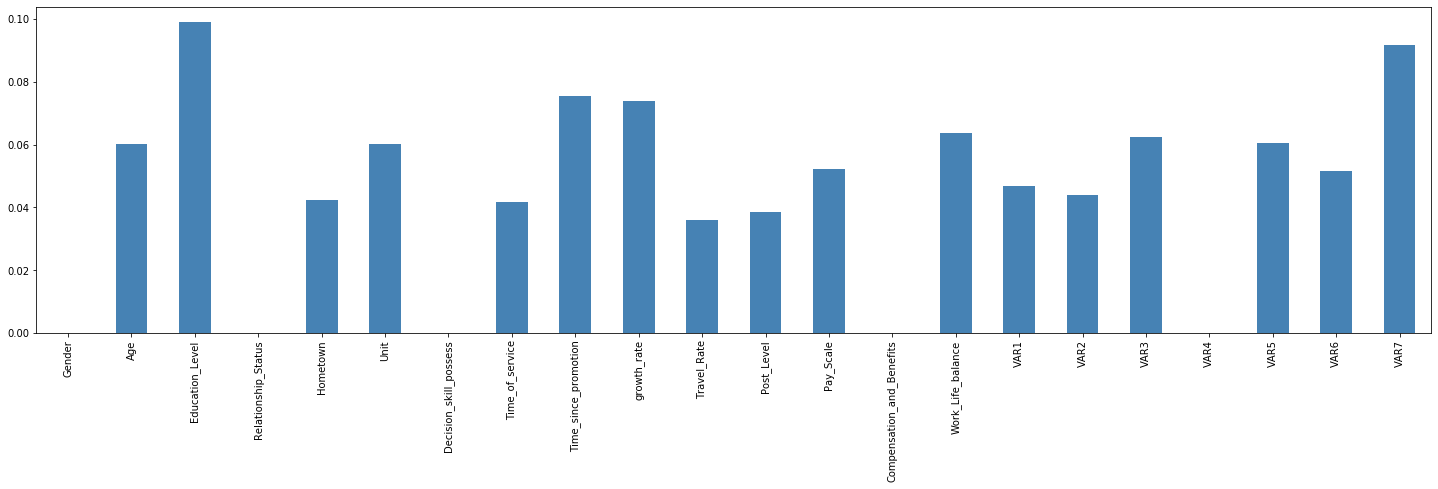

In [76]:
pd.Series(xgbr.feature_importances_, index=cols_exploratary).plot.bar(color='steelblue', figsize=(25, 6))

In [74]:
def submit(pred_val, test_df, filename = 'submission_3.csv'):
    ## Employee_ID   Attrition_rate
    empId = test_df['Employee_ID'].tolist()
    dict = {"Employee_ID": empId, "Attrition_rate": pred}
    sub = pd.DataFrame(dict)
    sub.to_csv(filename, index=False)
submit(pred, test_df)